In [2]:
# from PIL import Image
# import pillow_avif
# img = Image.open('sample_invoice.avif')
# img.save('output.png')

In [1]:
key = 'keykeykeykey'
end_point = 'https://rajtestinvoice1.cognitiveservices.azure.com/'

In [2]:
from azure.core.credentials import AzureKeyCredential
from azure.ai.formrecognizer import DocumentAnalysisClient
credential = AzureKeyCredential(key)
document_analysis_client = DocumentAnalysisClient(end_point, credential)

In [3]:
from azure.storage.blob import BlobServiceClient
blob_account_url = 'https://rajmachinelear7916564259.blob.core.windows.net'
storage_credential = 'yyyyyyy'
blob_service_client = BlobServiceClient(account_url=blob_account_url, credential=storage_credential)
blob_service_client

In [4]:
all_containers = blob_service_client.list_containers()
list(all_containers)

[{'name': 'azureml', 'last_modified': datetime.datetime(2024, 12, 12, 16, 23, 2, tzinfo=datetime.timezone.utc), 'etag': '"0x8DD1AC9401DB54F"', 'lease': {'status': 'unlocked', 'state': 'available', 'duration': None}, 'public_access': 'container', 'has_immutability_policy': False, 'deleted': None, 'version': None, 'has_legal_hold': False, 'metadata': None, 'encryption_scope': <azure.storage.blob._models.ContainerEncryptionScope object at 0x0000024CC024F4D0>, 'immutable_storage_with_versioning_enabled': False},
 {'name': 'azureml-blobstore-7fe2a74d-f342-498d-930a-08e2ab4c0d18', 'last_modified': datetime.datetime(2024, 12, 12, 16, 23, 13, tzinfo=datetime.timezone.utc), 'etag': '"0x8DD1AC946B1E93E"', 'lease': {'status': 'unlocked', 'state': 'available', 'duration': None}, 'public_access': 'container', 'has_immutability_policy': False, 'deleted': None, 'version': None, 'has_legal_hold': False, 'metadata': None, 'encryption_scope': <azure.storage.blob._models.ContainerEncryptionScope object a

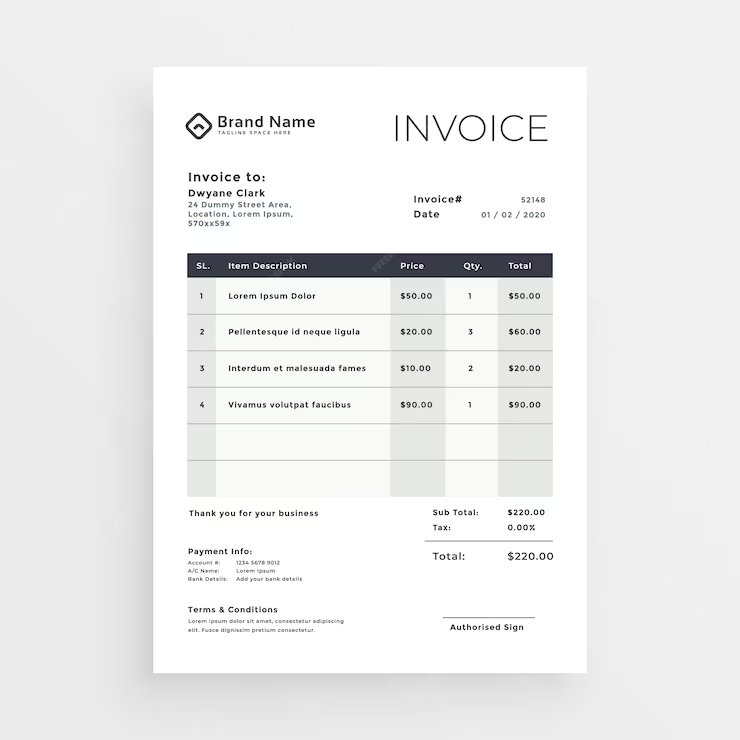

In [6]:
blob_client = blob_service_client.get_blob_client('azureml','invoice.png')
data = blob_client.download_blob()
from PIL import Image
image = Image.open(data)
image

In [8]:
# Initialize Blob Client
from azure.storage.blob import BlobClient
blob_account_url = 'https://rajmachinelear7916564259.blob.core.windows.net'
storage_credential = 'yyyyyyy'
blob_url = 'https://rajmachinelear7916564259.blob.core.windows.net/azureml/invoice.png'

blob_client = BlobClient.from_blob_url(blob_url=blob_url, credential=storage_credential)

# Download the image invoice from Azure Storage
with open('invoice.png', 'wb') as download_file:
    download_file.write(blob_client.download_blob().readall())

# Analyze the image using Document Intelligence
with open('invoice.png', 'rb') as invoice_image:
    poller = document_analysis_client.begin_analyze_document('prebuilt-invoice', document=invoice_image)
    result = poller.result()

    # Print out the extracted data
    for idx, invoice in enumerate(result.documents):
        print(f'============Recognise Invoice: {idx + 1}===================')
        #for name, field in invoice.fields.items():
            #print(f'{name}: {field.value}')
        for i in invoice.fields:
            print(i)
            print(f'{i}:{invoice.fields[i].value}')

============Recognise Invoice: 1===================
CustomerAddress
CustomerAddress:AddressValue(house_number=24, po_box=None, road=None, city=None, state=None, postal_code=None, country_region=None, street_address=24, unit=None, city_district=None, state_district=None, suburb=None, house=Dummy Street Area.
Location, Lorem Ipsum,
570xx59x, level=None)
CustomerAddressRecipient
CustomerAddressRecipient:Dwyane Clark
CustomerName
CustomerName:Dwyane Clark
InvoiceDate
InvoiceDate:2020-01-02
InvoiceId
InvoiceId:52148
InvoiceTotal
InvoiceTotal:$220.0
Items
Items:[DocumentField(value_type=dictionary, value={'Amount': DocumentField(value_type=currency, value=CurrencyValue(amount=50.0, symbol=$, code=USD), content=$50.00, bounding_regions=[BoundingRegion(page_number=1, polygon=[Point(x=508.0, y=291.0), Point(x=539.0, y=292.0), Point(x=539.0, y=300.0), Point(x=508.0, y=300.0)])], spans=[DocumentSpan(offset=221, length=6)], confidence=0.852), 'Description': DocumentField(value_type=string, value='

In [9]:
for idx, invoice in enumerate(result.documents):
    print(f'============Recognise Invoice: {idx + 1}===================')
    for i in invoice.fields:
        if i=='Items':
            value=invoice.fields[i].value[0].value['Amount'].value
            item=invoice.fields[i].value[0].value['Description'].value
            print(f'{item} has {value}')

============Recognise Invoice: 1===================
Lorem Ipsum Dolor has $50.0


In [10]:
for idx, invoice in enumerate(result.documents):
    print(f'============Recognise Invoice: {idx + 1}===================')
    for i in invoice.fields:
        if i=='Items':
            print(len(invoice.fields[i].value))

============Recognise Invoice: 1===================
4


In [11]:
for idx, invoice in enumerate(result.documents):
    print(f'============Recognise Invoice: {idx + 1}===================')
    for i in invoice.fields:
        if i=='Items':
            for element in range(len(invoice.fields[i].value)):
                value=invoice.fields[i].value[element].value['Amount'].value
                item=invoice.fields[i].value[element].value['Description'].value
                print(f'{item} has {value}')
        if i!='Items':
             print(f'{i}:{invoice.fields[i].value}')

============Recognise Invoice: 1===================
CustomerAddress:AddressValue(house_number=24, po_box=None, road=None, city=None, state=None, postal_code=None, country_region=None, street_address=24, unit=None, city_district=None, state_district=None, suburb=None, house=Dummy Street Area.
Location, Lorem Ipsum,
570xx59x, level=None)
CustomerAddressRecipient:Dwyane Clark
CustomerName:Dwyane Clark
InvoiceDate:2020-01-02
InvoiceId:52148
InvoiceTotal:$220.0
Lorem Ipsum Dolor has $50.0
Pellentesque id neque ligula has $60.0
Interdum et malesuada fames has $20.0
Vivamus volutpat faucibus has $90.0
SubTotal:$220.0
